In [3]:
import json
transactions = []
with open("transactions", "r") as fp:
    transactions = json.load(fp)

In [4]:
transactions

[['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['low fat yogurt',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['whole wheat pasta',
  

In [24]:
from apyori import apriori
from pyECLAT import ECLAT
from fpgrowth_py import fpgrowth

import numpy as np

import time
import memory_profiler as mp
import pandas as pd

times = [[], [], []]

eclat = ECLAT(pd.DataFrame(transactions))
transesForFp = [list(filter(lambda x: x != 'nan', it)) for it in transactions]

x = []
for i in np.arange(0.01, 0.51, 0.01):
    print(i)
    x.append(i)

    start = time.time()
    apriori(transactions=transactions, min_support=i, min_confidence=0.2, min_lift=3, min_length=2, max_length=2)
    end = time.time() - start
    times[0].append(end)


    start = time.time()
    eclat.fit(min_support=i, min_combination=2, max_combination=2)
    end = time.time() - start
    times[1].append(end)

    start = time.time()
    fpgrowth(transesForFp, minSupRatio=i, minConf=0.2)
    end = time.time() - start
    times[2].append(end)

memoryUsage = [[], [], []]

for i in np.arange(0.01, 0.51, 0.01):
    
    memoryUsage[0].append(
        mp.memory_usage((apriori, (transactions,), { 'min_support':i, 'min_confidence':0.2, 'min_lift':3, 'min_length':2, 'max_length':2 }), max_usage=True)
    )

    memoryUsage[1].append(
        mp.memory_usage((eclat.fit, (), {'min_support':i, 'min_combination':2, 'max_combination':2}), max_usage=True)
    )

    memoryUsage[2].append(
        mp.memory_usage((fpgrowth, (transesForFp, i, 0.2)), max_usage=True)
    )


/opt/homebrew/Cellar/python@3.11/3.11.5/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:104: UserWarning: resource_tracker: process died unexpectedly, relaunching.  Some resources might leak.
  warnings.warn('resource_tracker: process died unexpectedly, '


Combination 2 by 2


2775it [00:05, 549.50it/s]


Combination 2 by 2


1378it [00:02, 560.84it/s]


Combination 2 by 2


630it [00:01, 550.37it/s]


Combination 2 by 2


435it [00:00, 556.04it/s]


Combination 2 by 2


300it [00:00, 553.72it/s]


Combination 2 by 2


190it [00:00, 542.38it/s]


Combination 2 by 2


120it [00:00, 541.17it/s]


Combination 2 by 2


78it [00:00, 525.17it/s]


Combination 2 by 2


78it [00:00, 510.01it/s]


Combination 2 by 2


45it [00:00, 496.67it/s]


Combination 2 by 2


45it [00:00, 501.26it/s]


Combination 2 by 2


21it [00:00, 455.62it/s]


Combination 2 by 2


21it [00:00, 464.50it/s]


Combination 2 by 2


21it [00:00, 474.59it/s]


Combination 2 by 2


21it [00:00, 462.64it/s]


Combination 2 by 2


21it [00:00, 470.99it/s]


Combination 2 by 2


21it [00:00, 470.25it/s]


Combination 2 by 2


15it [00:00, 464.98it/s]


Combination 2 by 2


15it [00:00, 447.62it/s]


Combination 2 by 2


10it [00:00, 438.83it/s]


Combination 2 by 2


10it [00:00, 497.99it/s]


Combination 2 by 2


10it [00:00, 491.89it/s]


Combination 2 by 2


10it [00:00, 405.70it/s]


Combination 2 by 2


10it [00:00, 425.82it/s]


Combination 2 by 2


10it [00:00, 428.58it/s]


Combination 2 by 2


6it [00:00, 486.74it/s]


Combination 2 by 2


6it [00:00, 423.01it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set
Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


Combination 2 by 2


0it [00:00, ?it/s]


No frequent item set
No frequent item set
No frequent item set


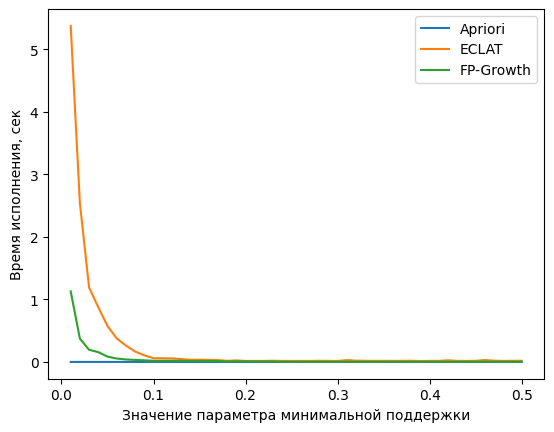

In [19]:
import matplotlib.pyplot as plt

plt.plot(x, times[0], label="Apriori")
plt.plot(x, times[1], label="ECLAT")
plt.plot(x, times[2], label="FP-Growth")
plt.legend()
plt.ylabel("Время исполнения, сек")
plt.xlabel("Значение параметра минимальной поддержки")
plt.show()

In [39]:
memoryUsage[2]

[[269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875],
 [269.21875, 269.21875, 269.21875, 269.21875, 269.21875, 269.21875],
 [269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875],
 [269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875],
 [269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875],
 [269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875,
  269.21875],
 [269.21875, 269.21875, 269.21875, 269.21875, 269.21875, 269.21875],
 [269.21875, 269.21875, 269.21875, 269.21875, 269.2

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (50,) + inhomogeneous part.

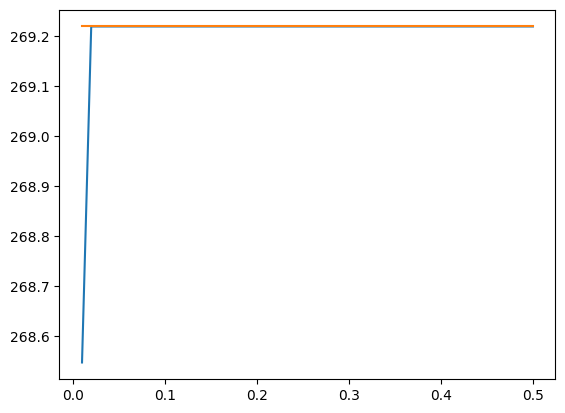

In [38]:
plt.plot(x, memoryUsage[0], label="Apriori")
plt.plot(x, memoryUsage[1], label="ECLAT")
plt.plot(x, memoryUsage[2], label="FP-Growth")
plt.legend()
plt.ylabel("Максимально занятая память процессом, MiB")
plt.xlabel("Значение параметра минимальной поддержки")
plt.show()